# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [2]:
#ваш код
import pandas as pd
df = pd.read_csv('C:/Users/soyan/Desktop/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [3]:
#ваш код
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [4]:
#ваш код
# Выделяем предикторы (X) и целевую переменную (y)
X = df[['TV', 'radio', 'newspaper']].values
y = df['sales'].values

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [5]:
import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [6]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [7]:
#ваш код
# Инициализируем веса и остаток
w = np.zeros(X.shape[1])
r = y - np.dot(X, w)

# Задаем количество итераций
iterations = 1000

# Алгоритм координатного спуска
for _ in range (iterations):
    for j in range(X.shape[1]):
        # Обновляем остаток р
        r_j = r + X[:, j] * w[j]

        # Обновляем вес w_j
        w[j] = np.dot(X[:, j], r_j) / np.dot(X[:, j], X[:, j])

        # Обновляем остаток р
        r = r_j - X[:, j] * w[j]

print("Веса модели линейной регрессии", w)

Веса модели линейной регрессии [ 41.56217205 110.13144155  73.52860638  -0.55006384]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [8]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [10]:
#ваш код
# Выделяем предикторы (X) и целевую переменную (y)
X = df[['TV', 'radio', 'newspaper']].values
y = df['sales'].values

# высчитываем среднее и стандартное отклонение каждого столбца
means = np.mean(X[:, 1:], axis=0)
stds = np.std(X[:, 1:], axis=0)

# Проводим стандартизацию
X[:, 1:] = (X[:, 1:] - means) / stds

# Печатаем первые 5 строк для проверки
print("Нормализованные данные:\n", X[:5])  

Нормализованные данные:
 [[230.1          0.98152247   1.77894547]
 [ 44.5          1.08280781   0.66957876]
 [ 17.2          1.52846331   1.78354865]
 [151.5          1.21785493   1.28640506]
 [180.8         -0.84161366   1.28180188]]


**Добавим единичный столбец**

In [11]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [12]:
#ваш код
def mse_error(y_true, y_pred):
    """
    Вычисляет среднеквадратичную ошибку между реальными и предсказанными значениями.

    :param y_true: Список или массив реальных значений.
    :param y_pred: Список или массив предсказанных значений.
    :return: Значение среднеквадратичной ошибки.
    """
    if len(y_true) != len(y_pred):
        raise ValueError("Длины реальных и предсказанных массивов должны совпадать.")

    # Вычисляем ошибки
    errors = y_true - y_pred
    
    # Возвращаем среднее значение квадратов ошибок
    mse = np.mean(errors ** 2)
    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [14]:
#ваш код
# Наивный прогноз: среднее значение продаж
mean_sales = np.mean(y)
y_pred_naive = np.full_like(y, mean_sales)

mse = mse_error(y, y_pred_naive)
print(mse)

27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [19]:
#ваш код
def lin_pred(X, w):
    return np.dot(X, w)
    
y_pred = lin_pred(X, w)
# Печатаем первые 5 значений для проверки
print("Вектора прогнозов:\n", y_pred[:5])  


Вектора прогнозов:
 [25453.99831937  5021.66035953  2047.22767824 16815.31513845
 19890.73905283]


**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [20]:
#ваш код
def stoch_grad_step(X, y, w, train_ind, eta):
    """
    Реализует шаг стохастического градиентного спуска.

    Parameters:
    X (numpy.ndarray): Матрица предикторов.
    y (numpy.ndarray): Вектор истинных значений.
    w (numpy.ndarray): Вектор весов.
    train_ind (int): Индекс объекта выборки, по которому считается изменение весов.
    eta (float): Шаг градиентного спуска.

    Returns:
    numpy.ndarray: Обновленный вектор весов.
    """
    # Количество признаков
    l = X.shape[0]
    
    # Выбор текущего объекта и настоящего значения
    x_i = X[train_ind]
    y_i = y[train_ind]

    # Прогноз для текущего объекта
    prediction = np.dot(x_i, w)

    # Градиентное обновление
    gradient = (2/l) * (np.dot(x_i, prediction - y_i))

    # Обновление весов
    w_new = w - eta * gradient

    return w_new

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [64]:
# ваш код
def stochastic_gradient_descent(X, y, w_init, eta, max_iter, tol):
    """
    Реализует алгоритм стохастического градиентного спуска.

    Parameters:
    X (numpy.ndarray): Матрица предикторов.
    y (numpy.ndarray): Вектор истинных значений.
    w_init (numpy.ndarray): Начальный вектор весов.
    eta (float): Темп обучения.
    max_iter (int): Максимальное количество итераций.
    tol (float): Порог на евклидовое расстояние для остановки.

    Returns:
    Tuple[numpy.ndarray, List[float]]: Кортеж из окончательного вектора весов и списка ошибок на каждой итерации.
    """
    
    w = w_init
    n_samples = X.shape[0]
    distance = float('inf')
    errors = []
    iter_count = 0

    while distance > tol and iter_count < max_iter:
        # Выбираем случайный индекс из выборки
        random_index = np.random.randint(n_samples)
        
        # Вычисляем MSE (среднеквадратичную ошибку)
        prediction = np.dot(X, w)
        mse = np.mean((y - prediction)**2)
        errors.append(mse)
        
        # Сохраняем старые веса
        w_old = w.copy()
        
        # Делаем шаг градиентного спуска
        w = stoch_grad_step(X, y, w, random_index, eta)
        
        # Рассчитваем евклидово расстояние между новым и старым вектором весов
        distance = np.linalg.norm(w - w_old)
        
        # Увеличиваем счетчик итераций
        iter_count += 1

    return w, errors

eta = 0.003                   # темп обучения
max_iter = 10000             # максимальное количество итераций
tol = 1e-6                    # условие остановки по расстоянию весов

# Запуск алгоритма
final_weights, mse_errors = stochastic_gradient_descent(X, y, w_init, eta, max_iter, tol)

print("Окончательные веса:", final_weights)
print("Ошибки:", mse_errors)

Окончательные веса: [0.53125852 0.0853516  0.70620476 0.13806701]
Ошибки: [223.71625, 35.388859862866504, 23.52992347613813, 23.139729673158126, 29.030658807000663, 32.05956527158814, 52.426185196626214, 65.26467926285349, 58.732212180882506, 65.32535056569935, 79.02494293744824, 50.67307483643408, 38.4814357344252, 45.74159918147621, 49.642614263557604, 52.91982627089277, 24.39811053852885, 48.617105702072905, 63.685725653060835, 54.93378965341196, 62.72737292316999, 23.66150930969528, 23.32876790775309, 45.093157182705966, 32.5434807779126, 36.62110828536075, 47.963993896508846, 54.88616620624591, 35.521827742040635, 26.768648724763136, 45.52794608309046, 27.033502168713845, 24.02078706054448, 23.324018131550538, 30.715922823545142, 27.652564019427928, 29.33807271468575, 27.535816598192895, 23.48701472412683, 42.104567980571154, 27.978309142543043, 81.94841383659877, 28.72372656064989, 23.023285055128664, 23.173682357131803, 30.343574354647554, 23.27072630095552, 23.789871672003027, 

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

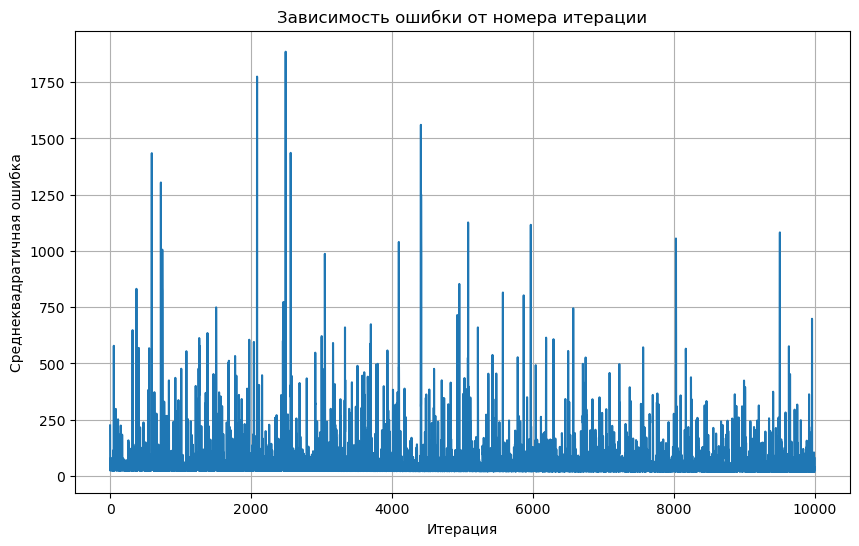

In [65]:
# ваш код
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(mse_errors)), mse_errors)
plt.xlabel('Итерация')
plt.ylabel('Среднеквадратичная ошибка')
plt.title('Зависимость ошибки от номера итерации')
plt.grid(True)
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [66]:
# ваш код
print("Окончательные веса:", final_weights)

Окончательные веса: [0.53125852 0.0853516  0.70620476 0.13806701]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [63]:
# ваш код
print("Среднеквадратичная ошибка на последней итерации:", mse_errors[-1])

Среднеквадратичная ошибка на последней итерации: 28.03035981302576


Выводы:
При увеличении темпа обучения растёт количество ошибок на итерацию, и показатель mse стретимится к бесконечности, что может говорить о том, что модель обучения может быть неустойчивая. Если темп обучения (eta) установлен на слишком высокое значение, обновления весов становятся чрезмерно крупными. Это приводит к тому, что модель может "перепрыгивать" оптимальные значения параметров и вообще не сходиться. При слишком большом темпе обучения градиентный спуск может не только не сходиться к минимуму, но и расходиться, увеличивая ошибку с каждой итерацией. Это означает, что модель не учится на данных, а, напротив, все дальше уходит от оптимального решения. 
Для увеличения точности модели можно использовать низкие значения дял темпа обучения и/или использовать адаптивные методы обучения.